# COMBINATION OF NATURAL LANGUAGE PROCESSING, EXPLORATORY DATA ANALYSIS: WAY TO GENERATE INSIGHT IN A INTUITIVE WAY  

### Introduction
In this kernel, we use the women e'commerce clothing review dataset, and try to explore, visualize and understand as much as we can. We will be using plotly and bokeh visualization libraries. We are going to both explore text data and also visualize numeric and categorical features. 

### Import modules

In [ ]:
import numpy as np 
import pandas as pd 
import pandas_profiling as pp
from tqdm import tqdm
from textblob import TextBlob

# Plotly tools
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objs as go
import plotly.plotly as py
from sklearn.feature_extraction.text import CountVectorizer

# Load the data set for preprocessing

## Start preprocessing  

#### a- Features summary and understanding using pandas_profiling
We will be using the **pandas_profiling** library for visualization. Instead of trying to visualize our features one by one with pandas, **pandas_profiling** gives a HTML report about all the variables of our data set. 

In [ ]:
review_df = pd.read_csv('../input/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
# Perform and advanced visualisation using pandas_profiling library
pp.ProfileReport(review_df)

#### b- Understanding of the output  
According to the output, our data set contains: 

- 11 variables / features  / columns  ==> 5 of them are numeric, 5 are categorical, 1 is boolean. 
- 23486 observations / rows   

In the warning **field**, we can see that:  

- Title variable has 16.2% of missing values.  
- Review Text has also missing values, but not as much as Title variable.  

Here are just some few details about the output of the library. There others are self explanatory.  


In [ ]:
# We are going to print some reviews in order to better understand the kind of preprocessing
# task we will be performing.

some_reviews_index = [7, 9, 16] 

# tqdm is for printing the status bar
for rw in tqdm(some_reviews_index):
    print(review_df['Review Text'].values[rw])
    print(print("="*50))

##### Observation from pandas_profiling and previous review text output: 

<ol>
The previous results from the pandas_profiling output and the result of the **review text** tell us more about the preprocessing actions to perform. So, we are going to : 
    <li>Remove the **Title** column because it contains a lot (3810) of missing values </li>
    <li>Remove the rows (observations) where the **Review Text** is missing (NaN). We will not remove this column because the missing information is not as much as **Title**</li>
    <li>Clean **Review Text** column to replace abreviations, remove stop words, put words in lowercase, etcetera</li>
    <li>Create new feature for the length of the review</li>
    <li>Create new feature for the word count of the review</li>
    <li>Calculate sentiment polarity which lies in [-1, 1] where -1 means negative polarity and 1 means positive polarity. We will be doing that with TextBlob to do this task</li>
</ol>

In [ ]:
# 1- Remove the Title, Unnamed columns 
review_df.drop(['Title', 'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# 2- Remove the rows where Review Text is missing
review_df = review_df[~review_df['Review Text'].isnull()] 

In [ ]:
# 3- clean Review Text column

# As we can see previously in the six reviews we printed, we will perform many cleaning process
# Remove special characters
# remove all digits
# remove all backslask 
# remove additional spaces
# remove all the stopwords
# put all the into lowercase

#----------------------------
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
# This function will give the decontracted format of the words.
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# ACTION N°1
print("Before decontraction: ")
print(review_df['Review Text'].values[9])
print(print("="*50))


# Let check the review n°9 after decontraction
rew = decontracted(review_df['Review Text'].values[9])
print("After decontraction: ")
print(rew)

In [ ]:
preprocessed_review_text = []

for review in tqdm(review_df['Review Text'].values):
    rw = decontracted(review)
    rw = rw.replace('\\r', ' ')
    rw = rw.replace('\\"', ' ')
    rw = rw.replace('\\n', ' ')
    rw = re.sub('[^A-Za-z0-9]+', ' ', rw)
    
    # https://gist.github.com/sebleier/554280
    rw = ' '.join(e for e in rw.split() if e.lower() not in stopwords)
    preprocessed_review_text.append(rw.lower().strip())

In [ ]:
# ACTION N°2
# Action of preprocessing
print("Before preprocessing: ")
print(review_df['Review Text'].values[9])

# Let perform the preprocessing
print("\nAfter preprocessing: ")
print(preprocessed_review_text[9])

<ul>
**observation result of preprocessing:** We can notie that the action of preprocessing performed well, because in: 
    <li>ACTION N°1: we performed the decontraction action, which decontracted all the contracted expressions. For example **wasn't** became **was not**, **you're** became **you are** </li>
    <li>ACTION N°2: we applied the final preprocessing action which removed stop words, punctuations, etcetera</li>
</ul>

In [ ]:
# 4- Feature for length of review
review_df['review_length'] = review_df['Review Text'].astype(str).apply(len) 

# 5- Create new feature for the word count of the review 
review_df['word_count'] = review_df['Review Text'].apply(lambda x: len(str(x).split())) 

# 6- Calculate sentiment polarity  
review_df['polarity'] = review_df['Review Text'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
# Let check if our new columns have been added to our set of features.
review_df.columns

<ol>
**Remark**: We can see that our new columns ('review_length', 'word_count', 'polarity') have been added to the set of initial columns.  
Below, we are going to preview if the sentiment polarity score works. To do so, we are going to check three cases: 
    <li>Select three reviews with the highest sentiment polarity (polarity = 1)</li>
    <li>Select three reviews with the most neutral sentiment polarity (polarity = 0)</li>
    <li>Select three reviews with the most negative sentiment polarity (polarity = -1)</li>
</ol>

In [ ]:
# 1- Highest sentiment polarity 
print('3 random reviews with the highest positive sentiment polarity: \n')
cl = review_df.loc[review_df.polarity == 1, ['Review Text']].sample(3).values
for c in cl:
    print("review: ",c[0])

In [ ]:
# 2- Neutral sentiment polarity
print('3 random reviews with the most neutral sentiment polarity: \n')
cl = review_df.loc[review_df.polarity == 0, ['Review Text']].sample(3).values
for c in cl:
    print("review: ",c[0])

In [ ]:
# Most negative sentiment polarity (0)

# As there is no review with the value of polarity to -1, we are going to take 
# those have a polarity less than -0.9.
print('3 random reviews with the most negative sentiment polarity: \n')
cl = review_df.loc[review_df.polarity < -0.90 , ['Review Text']].sample(3).values
for c in cl:
    print("review: ",c[0])

#### c- Change Review Text values:   
We are going to replace the **Review Text** column values by the preprocessed value in order to make them ready for further analyzis. 

In [ ]:
review_df['Review Text'] = preprocessed_review_text

In [ ]:
# Let check if the operation worked using the previous polarity analysis. 
# We are goin to take only those for negative polarity
print('3 random reviews with the most negative sentiment polarity: \n')
cl = review_df.loc[review_df.polarity < -0.90 , ['Review Text']].sample(3).values
for c in cl:
    print("review: ",c[0])

**Remark:** As we can see, our preprocessing process for the **Review Text** performed very well.  

## End of preprocessing

# Exploratory Data Analysis with plotly  
We are going to use the **plotly** library for our visualization. This is more dynamic than static tools like **pandas**, **seaborn** etcetera ...  
<ol>
In this part, we will perform three technics of analysis for some features: 
    <li>Univariate analysis</li>
    <li>Bivariate analysis</li>
</ol>

## 1. Univariate analysis  
Univariate analysis is the simplest form of analyzing data. In **univariate**  expression, **uni** means **one**, so in other hand, the data set is considered to have only one variable. It does not deal with causes or relationships (unlike regression), and it's main goal is to describe. So it takes data, summarizes it, and finds patterns in that data.  
There are several options for describing data with univariate analysis, such as: 

- Histogram:   
- Bar plots  
- Boxplot

### Histograms 
A histogram is a type of grapph that provides a visual interpretation of **numerical data** by indicating the number of data points that lie within a range of values. These ranges of values are called **bins** or **classes**, and the frequency of the data that falls in each class is depicted by the use of a bar. The higher that bar is, the greater the frequency of data values in that bin. We will only be analyzing **numerical features**. As given in the overview of **pandas_profiling** output, there are five of them, that means we are going to plot the histogram for 5 + 2 (our two new features: polarity, word_count) features. 


#### a - Feature: polarity

In [ ]:
review_df['polarity'].iplot(
kind='hist',
    bins=50,
    xTitle='Polarity',
    linecolor='green',
    yTitle='Count',
    title='Sentiment Polarity Distribution'
)

**Observation:** We notice that most of the sentiment polarities are greater than zero, and the most frequent sentiment polarity lies in [0.175 - 0.225]. Than means most of women gave a positive review after buying their clothes online.  

#### a - Feature: Rating**

In [ ]:
review_df['Rating'].iplot(
kind='hist',
    xTitle='Rating',
    linecolor='green',
    yTitle='Count',
    title='Reviewers rating Distribution'
)

**Observation:** We can notice that the ratings are in align with the polarity score, most of the customers have given a rate of 5 and 4, a very few rate of 1 and 2. 

#### c - Feature: Age

In [ ]:
review_df['Age'].iplot(
kind='hist',
    bins=50,
    xTitle='Age',
    linecolor='green',
    yTitle='Count',
    title='Reviewers age Distribution'
)

**Observation:** Most of the reviewers are in their 30s to 40s. And the most representative of them are those aged from 38 to 39. 

#### d - Feature: Review_length

In [ ]:
review_df['review_length'].iplot(
kind='hist',
    bins=50,
    xTitle='Review Length',
    linecolor='green',
    yTitle='Count',
    title='Review Length Distribution'
)

**observation:** a great majority of reviewers wrote a review of more than 500 words. 

#### e - Feature: Review Word count

In [ ]:
review_df['word_count'].iplot(
kind='hist',
    bins=50,
    xTitle='Word count',
    linecolor='green',
    yTitle='Count',
    title='Review Text Word Count Distribution'
)

**observation:** There were a quite number of people who like to leave a very long review. 

### Bar plot 
A bar plot is like a histogram, but used for **categorical data** in order to compare diffente categories of data.  
Below is a nice comparison between Histogram and Barplot.  
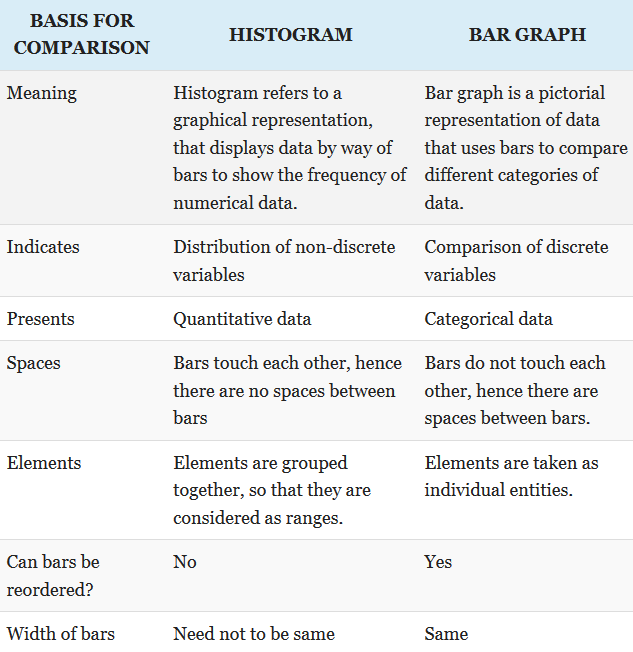

#### a - Feature: Class Name 

In [ ]:
review_df.groupby('Class Name').count()['Clothing ID'].sort_values(ascending=False).iplot(kind='bar', 
                                                                                   yTitle='Count', 
                                                                                   linecolor='green', 
                                                                                   opacity=0.8,
                                                                                   title='Bar chart of Class Name', 
                                                                                   xTitle='Class Name')

**observation:** The type of clothes that has the most reviews are **Dresses**, **Knits**, **Blouses** and the clothes least represented are **Chemises**, **Casual botto**

#### b - Feature: Department Name

In [ ]:
review_df.groupby('Department Name').count()['Clothing ID'].sort_values(ascending=False).iplot(kind='bar', 
                                                                                   yTitle='Count', 
                                                                                   linecolor='green', 
                                                                                   opacity=0.8,
                                                                                   title='Bar chart of Department Name', 
                                                                                   xTitle='Department Name')

**observation:** The department which has the most reviews is **Tops** and, **Trend** is the least one.  

#### c - Feature: Division Name

In [ ]:
review_df.groupby('Division Name').count()['Clothing ID'].sort_values(ascending=False).iplot(kind='bar', 
                                                                                   yTitle='Count', 
                                                                                   linecolor='green', 
                                                                                   opacity=0.8,
                                                                                   title='Bar chart of Division Name', 
                                                                                   xTitle='Division Name')

**observation:** **General** division has the most number of review, and **Initmates** has the least number of review.  

#### d - Feature: Review Text   
This feature is not as other categorical features, because it contains text data. To be able to visualize barplot, we need to perform some operations like:  

- N-gram extractions. Those N-grams are used to describe the number of words used as observation points. 
It is also important to know that :  
    - unigram means singly-worded  
    - bigram means 2-worded phrase 
    - trigram means 3-worded phrase. 

To perform that, we will use **CountVectorizer** function from **scikit-learn**.   

In [ ]:
# function to get TOP n-grams   
#@corpus: the document to analyse n-gram
#@n_gram_value: 1(unigram), 2(bigram), 3(trigram), etcetera
#@n: top n value to get.

def get_top_n_grams(corpus, n_gram_value, n=None):
    
    vector = CountVectorizer(ngram_range=(n_gram_value, n_gram_value)).fit(corpus)
    
    # We will used bag of words representation
    bow = vector.transform(corpus)
    sum_words = bow.sum(axis=0)
    
    # Determine frequency for the chart
    words_freq = [(word, sum_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

In [ ]:
# The final function to plot our N-grams
def plot_n_gram(common_words):
    for word, freq in common_words:
        print(word, freq)
        
    df = pd.DataFrame(common_words, columns=['ReviewText' , 'count'])
    df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
kind='bar', yTitle='Count', linecolor='black', title='Top 15 bigrams in review')

#### d.1 Let take the TOP 15 for unigram - bigram - trigram.  

##### d.1.1 Unigram 

In [ ]:
# Get TOP 15 1-gram
common_words_unigram = get_top_n_grams(review_df['Review Text'], 1, 15)

# Plot them
plot_n_gram(common_words_unigram)

##### d.1.2 Bigram 

In [ ]:
# Get TOP 15 2-gram
common_words_bigram = get_top_n_grams(review_df['Review Text'], 2, 15)

# Plot them
plot_n_gram(common_words_bigram)

##### d.1.3 Trigram 

In [ ]:
# Get TOP 15 3-gram
common_words_trigram = get_top_n_grams(review_df['Review Text'], 3, 15)

# Plot them
plot_n_gram(common_words_trigram)

### Boxplot  
This analysis give more statistical informations about the features we are analysing. It also show the corrupted values (if they exist) related to the feature. Regarding the statistical informations about quantiles (Q1, Q2, Q3), where

Q1 ==> 25th percentile  
Q2 ==> median value/50th percentile  
Q3 ==> 75th percentile  

In [ ]:
# Below is the function that will help doing all those analysis  
def show_box_plot_from_feature(feature_name, title):
    y0 = review_df.loc[review_df['Department Name'] == 'Tops'][feature_name]
    y1 = review_df.loc[review_df['Department Name'] == 'Dresses'][feature_name]
    y2 = review_df.loc[review_df['Department Name'] == 'Bottoms'][feature_name]
    y3 = review_df.loc[review_df['Department Name'] == 'Intimate'][feature_name]
    y4 = review_df.loc[review_df['Department Name'] == 'Jackets'][feature_name]
    y5 = review_df.loc[review_df['Department Name'] == 'Trend'][feature_name]
    
    trace0 = go.Box(
    y=y0,
    name = 'Tops',
    )
    trace1 = go.Box(
        y=y1,
        name = 'Dresses',
    )
    trace2 = go.Box(
        y=y2,
        name = 'Bottoms',
    )
    trace3 = go.Box(
        y=y3,
        name = 'Intimate',
    )
    trace4 = go.Box(
        y=y4,
        name = 'Jackets',
    )
    trace5 = go.Box(
        y=y5,
        name = 'Trend',
    )

    data = [trace0, trace1, trace2, trace3, trace4, trace5]
    layout = go.Layout(
        title = title
    )
    
    fig = go.Figure(data=data,layout=layout)
    iplot(fig)

#### a- Review length by department    

In [ ]:
show_box_plot_from_feature('review_length', "Review length Boxplot of Department Name")

**observation:** we notice that the median value of **Top** and **Intimate**  are relatively lower than the other departments.  

#### b- Sentiment polarity by department   

In [ ]:
show_box_plot_from_feature('polarity', "Sentiment polarity Boxplot of Department Name")

**observation:** We can notice that:  

- all the department have reached a highest sentiment polarity, exept **Trend** department.  
- **Trend** department is also the only one having the lowest median value.  
- **Tops**  department is the only one having a very bad sentiment polarity.  

#### c- Rating by department   

In [ ]:
show_box_plot_from_feature('Rating', "Rating Boxplot of Department Name")

**observation:** All the department have the same median rate exept **Trend** department.  

## 2. Bivariate analysis  
Bivariate analysis is similar to univariate analysis. In **bivariate**  expression, **bi** means **two**, so in other hand, the data set is considered to have only two variables. This technic is used to determine if there is a relationship between two sets of features/variables. 
There are several options for describing data with univariate analysis, such as: 

- Distribution of data   
- Bar plots  
- Boxplot

### Distribution of a features by recommendations

In [ ]:
# The function below will be used to do the analysis    
def distribution_by_recommendations(feature, title):
    axis1 = review_df.loc[review_df['Recommended IND'] == 1, feature]
    axis0 = review_df.loc[review_df['Recommended IND'] == 0, feature]

    trace1 = go.Histogram(
        x=axis0, name='Not recommended',
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=axis1, name = 'Recommended',
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay', title=title)
    fig = go.Figure(data=data, layout=layout)

    iplot(fig)

#### a- sentiment polarity of reviews 

In [ ]:
distribution_by_recommendations('polarity', 'Distribution of Sentiment polarity of reviews based on Recommendation')

**observation:** we notice that the reviews that have higher polarity value are more likely to be recommended.  

#### b- Distribution of ratings by recommendations

In [ ]:
distribution_by_recommendations('Rating', 'Distribution of Sentiment polarity of reviews based on Recommendation')

**observation:** we notice that recommended reviews have a higher rating than those from not 

#### c- Distribution of review lengths by recommendations

In [ ]:
distribution_by_recommendations('review_length', 'Distribution of review length based on Recommendation')

**observation:** we notice that recommended reviews tend to be lengthier than those of not recommended reviews.

### 2D Density jointplot of two features   


In [ ]:
# below is the function to plot that jointplot. 
def joint_plot_of_features(feature1, feature2):
    trace1 = go.Scatter(
    x=review_df[feature1], y=review_df[feature2], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
    )
    trace2 = go.Histogram2dContour(
        x=review_df[feature1], y=review_df[feature2], name='density', ncontours=20,
        colorscale='Hot', reversescale=True, showscale=False
    )
    trace3 = go.Histogram(
        x=review_df[feature1], name=feature1+' density',
        marker=dict(color='rgb(102,0,0)'),
        yaxis='y2'
    )
    trace4 = go.Histogram(
        y=review_df[feature2], name= feature2+' density', marker=dict(color='rgb(102,0,0)'),
        xaxis='x2'
    )
    data = [trace1, trace2, trace3, trace4]

    layout = go.Layout(
        showlegend=False,
        autosize=False,
        width=600,
        height=550,
        xaxis=dict(
            domain=[0, 0.85],
            showgrid=False,
            zeroline=False
        ),
        yaxis=dict(
            domain=[0, 0.85],
            showgrid=False,
            zeroline=False
        ),
        margin=dict(
            t=50
        ),
        hovermode='closest',
        bargap=0,
        xaxis2=dict(
            domain=[0.85, 1],
            showgrid=False,
            zeroline=False
        ),
        yaxis2=dict(
            domain=[0.85, 1],
            showgrid=False,
            zeroline=False
        )
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

#### a- sentiment polarity and rating

In [ ]:
joint_plot_of_features('Rating', 'polarity')

#### b- age and sentiment polarity

In [ ]:
joint_plot_of_features('Age', 'polarity')